<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [3]:
import pandas as pd
import os
import numpy as np

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [4]:
if os.path.exists('/datasets/insurance.csv'):
    df = pd.read_csv('/datasets/insurance.csv')
else:
    df = pd.read_csv('insurance.csv')
df

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
...,...,...,...,...,...
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


В данных нет пропусков, возраст и зарплату приведем к целочисленным значениям.

In [6]:
df['Возраст'] = df['Возраст'].astype('int64')
df['Зарплата'] = df['Зарплата'].astype('int64')

In [7]:
df.duplicated().sum()

153

В данных есть 153 полных дубля. Удалим дубли.

In [8]:
df = df.drop_duplicates().reset_index(drop=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4847 entries, 0 to 4846
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Пол                4847 non-null   int64
 1   Возраст            4847 non-null   int64
 2   Зарплата           4847 non-null   int64
 3   Члены семьи        4847 non-null   int64
 4   Страховые выплаты  4847 non-null   int64
dtypes: int64(5)
memory usage: 189.5 KB


Построим гистограммы распределения данных.

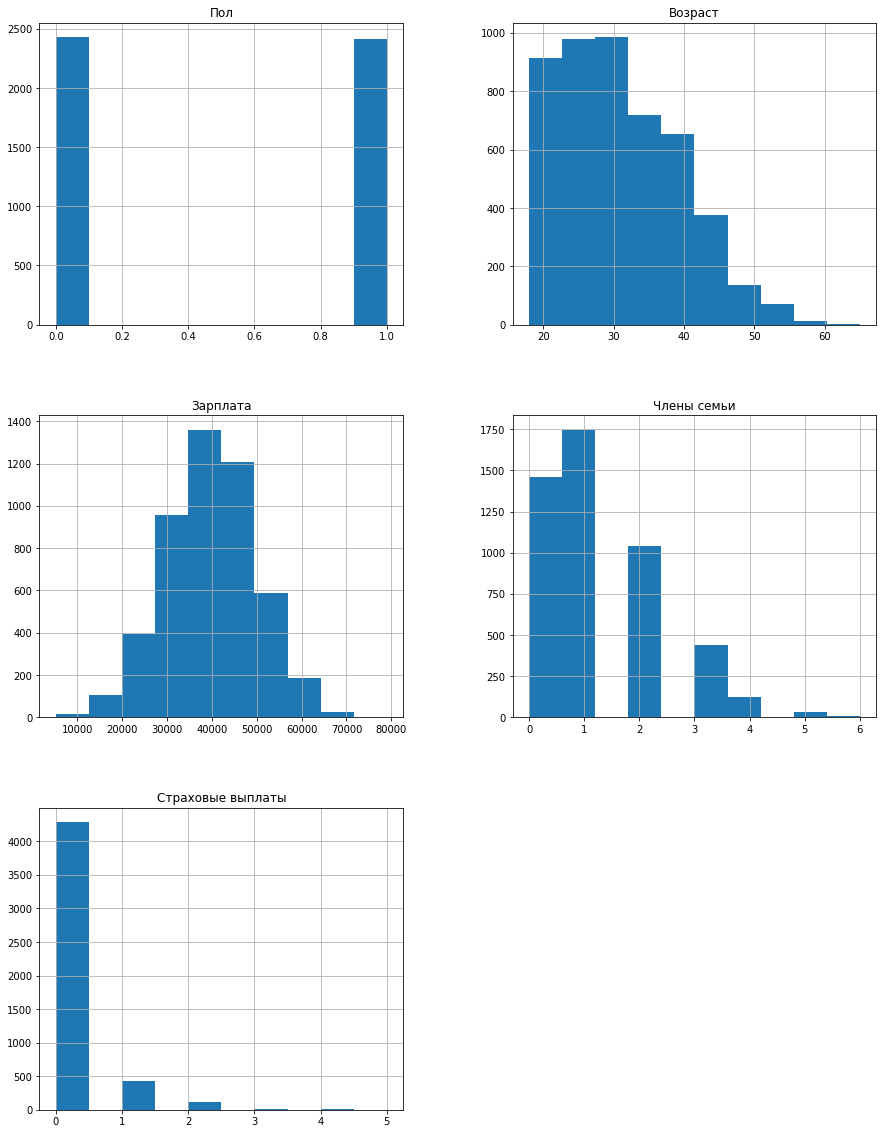

In [10]:
df.hist(figsize=(15, 20));

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Пол,4847.0,0.498453,0.500049,0.0,0.0,0.0,1.0,1.0
Возраст,4847.0,31.023932,8.487995,18.0,24.0,30.0,37.0,65.0
Зарплата,4847.0,39895.811223,9972.952441,5300.0,33200.0,40200.0,46600.0,79000.0
Члены семьи,4847.0,1.203425,1.098664,0.0,0.0,1.0,2.0,6.0
Страховые выплаты,4847.0,0.152259,0.468934,0.0,0.0,0.0,0.0,5.0


Проверим, коррелируют ли признаки между собой. Сильная корреляция независимых признаков (мультиколлениарность) может стать причиной переобучения модели.

In [12]:
df.corr()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
Пол,1.000000,0.001953,0.015456,-0.007315,0.011565
Возраст,0.001953,1.000000,-0.017386,-0.009064,0.654964
Зарплата,0.015456,-0.017386,1.000000,-0.031687,-0.013123
Члены семьи,-0.007315,-0.009064,-0.031687,1.000000,-0.039303
Страховые выплаты,0.011565,0.654964,-0.013123,-0.039303,1.000000


**Вывод по анализу данных**

В данных было 5000 строк без пропусков, были удалены 153 строки полных дублей.

Распределение по полам примерно одинаковое. Возраст большей части клиентов до 32 лет. Медианная зарплата 40200 р. максимально количество членов семьи - 6. Самое частое значение - 1 член семьи. Максимальное количество страховых выплат за 5 лет - 5, но чаще всего страховых выплат нет.

Сильнее всего коррелирует возраст с признаком страховой выплаты (т.е. с целевым признаком).

## Умножение матриц

Ответим на вопрос, изменится ли качество линейной регрессии, если признаки будут умножены на обратимую матрицу.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения линейной регрессии:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

В случае с умножением матрицы на обратимую матрицу P задача обучения будет следующая:

$$
w1 = \arg\min_w MSE(XPw, y)
$$

Формула обучения:

$$
w1 = ((XP)^T XP)^{-1} (XP)^T y
$$

Используем свойство матриц для раскрытия скобок:
    
$$
(ABC)^{-1} = C^{-1} B^{-1} A^{-1}
$$

Но оно применимо только для квадратных матриц.

Раскрываем скобки:

$$
w1 = (X^T P^T X P)^{-1} X^T P^T y
$$
$$
w1 = (P^T (X^T X) P)^{-1} X^T P^T y
$$

Матрицы P и $P^T$ квадратные, матрица $X^T X$ тоже квадратная. Раскрываем скобки:

$$
w1 = P^{-1} (X^T X)^{-1} (P^T)^{-1} X^T P^T y
$$

Поскольку:
$$
(P^T)^{-1} P^T = E
$$

получаем:
$$
w1 = (X^T X)^{-1} P^{-1} X^T y
$$
$$
w1 = P^{-1} (X^T X)^{-1} X^T y
$$
$$
w1 = P^{-1} * w
$$

Предсказания:

$$
a1 = X*P w1
$$

Заменим w1 на полученную на предыдущем шаге формулу:

$$
a1 = X P P^{-1} w =Xw
$$

Таким образом: $a = a1$

**Ответ:** Качество модели линейной регрессии не изменится.

**Обоснование:** Параметры в исходной задаче линейной регрессии и в преобразованной связаны через матрицу преобразования P.

## Алгоритм преобразования

**Алгоритм**

Умножим признаки датафрейма на обратимую матрицу. Обратимую квадратную матрицу создадим методом np.random.normal(), проверим, что существует обратная к ней методом np.linalg.inv(A). Размер матрицы n x n, где n - количество признаков.

**Обоснование**

Предсказания модели линейной регрессии не меняются при умножении признаков на обратимую матрицу.

## Проверка алгоритма

Разделим данные на признаки и целовой признак.

In [13]:
features = df.drop(['Страховые выплаты'], axis = 1)
target = df['Страховые выплаты']

Разделим данные на обучающую и валидационную выборки.

In [14]:
features_train, features_valid = train_test_split(features, test_size=0.25, random_state=12345)
target_train, target_valid = train_test_split(target, test_size=0.25, random_state=12345)

In [15]:
features_train

,Пол,Возраст,Зарплата,Члены семьи
4460,0,28,54500,2
3773,1,38,50700,1
4561,0,24,28000,1
1385,0,47,38800,0
724,0,40,32500,1
...,...,...,...,...
3497,1,23,28200,1
3492,0,30,33700,1
2177,1,20,28900,1
3557,1,33,38800,1


Построим модель линейной регрессии, обучим ее на данных до преобразования. В качестве метрики используем r2.

In [16]:
class LinearRegr:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0
    
mmodel = LinearRegr()
mmodel.fit(features_train, target_train)
predictions = mmodel.predict(features_valid)
print(r2_score(target_valid, predictions))

0.423077276158367


In [17]:
model = LinearRegression()
model.fit(features_train, target_train)
mpredictions = model.predict(features_valid)
print(r2_score(target_valid, mpredictions))

0.42307727615837565


Напишем функцию для генерации квадратной обратимой матрицы размером n x n, где n - количество признаков.

In [18]:
def get_rand_matrix():
    transform_matrix = np.random.rand(features.shape[1], features.shape[1])
    try: 
        inv = np.linalg.inv(transform_matrix)
        return transform_matrix, inv
    except:
        get_rand_matrix()  

Получим зашифрованную матрицу признаков для тренировочных признаков и валидационных.

In [19]:
transform_matrix, inv_matrix = get_rand_matrix()

features_transform = features_train @ transform_matrix
features_transform

,0,1,2,3
4460,683.425147,12745.751661,13923.979866,25538.506010
3773,647.585465,11863.556650,12957.462697,23768.133995
4561,360.581584,6553.195371,7157.362363,13128.683278
1385,512.298790,9087.592899,9922.632855,18203.318372
724,430.401417,7612.572702,8312.324290,15248.667167
...,...,...,...,...
3497,362.591412,6599.967591,7208.169480,13222.279403
3492,434.949789,7887.764928,8614.713610,15802.129662
2177,368.038955,6761.947823,7385.675504,13547.489198
3557,499.748226,9081.205542,9917.876905,18192.988527


In [20]:
features_valid_transform = features_valid @ transform_matrix

Проверим изменится ли качество модели после преобразования признаков.

In [21]:
model_transform = LinearRegr()
model_transform.fit(features_transform, target_train)
predictions_transform = model_transform.predict(features_valid_transform)
print(r2_score(target_valid, predictions_transform))

0.4230758279970248


In [22]:
model1 = LinearRegression()
model1.fit(features_transform, target_train)
mpredictions1 = model1.predict(features_valid_transform)
print(r2_score(target_valid, mpredictions1))

0.423077276154897


**Вывод:** r2 модели после преобразования признаков не изменилась.

# Выводы

Были предоставлены данные клиентов страховой компании «Хоть потоп». Необходимо было разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию и обосновать корректность его работы. При этом качество моделей машинного обучения не должно ухудшиться.

В данных было 5000 строк без пропусков, были удалены 153 строки полных дублей.

Распределение по полам примерно одинаковое. Возраст большей части клиентов до 32 лет. Медианная зарплата 40200 р. Максимальное количество членов семьи - 6. Самое частое значение - 1 член семьи. Максимальное количество страховых выплат за 5 лет - 5, но чаще всего страховых выплат нет.

Сильнее всего коррелирует возраст с признаком страховой выплаты (т.е. с целевым признаком). Такая корреляция не повлияет на качество модели.

В качестве метода защиты данных предлагается умножить признаки на обратимую квадратную матрицу. Предсказания модели линейной регрессии не меняются при умножении признаков на обратимую матрицу.
При запуске алгоритма каждый раз будет генерироваться новая случайная матрица для шифрования данных, таким образом, данные надежно защищены.